In [1]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

# MATPLOTLIB CONFIG

def conf_axis(ax, lim_x=10, lim_y=10):
    for ind, subplot in np.ndenumerate(ax):
        # Set axis ranges; by default this will put major ticks every 25.
        subplot.set_xlim(-lim_x, lim_x)
        subplot.set_ylim(-lim_y, lim_y)

        # Change major ticks to show every 1.
        subplot.xaxis.set_major_locator(MultipleLocator(2))
        subplot.yaxis.set_major_locator(MultipleLocator(2))

        # Change minor ticks to show every .5. (1/4 = .25)
        subplot.xaxis.set_minor_locator(AutoMinorLocator(2))
        subplot.yaxis.set_minor_locator(AutoMinorLocator(2))

        # Turn grid on for both major and minor ticks and style minor slightly differently.
        subplot.grid(which='major', color='#CCCCCC')
        subplot.grid(which='minor', color='#CCCCCC', linestyle='--')


# Splines

## Intro: Polynomials

They are _polynomials_:

$$
\sum_{i=0}^self.n a_i x^n = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n.
$$

The **degree** (or **order**) of a polynomial is the highest power of the variables. Polynomials of different degrees are given names: linear, quadratic, cubic, quartic... The higher the degree, the more changes of direction the polynomial can have.

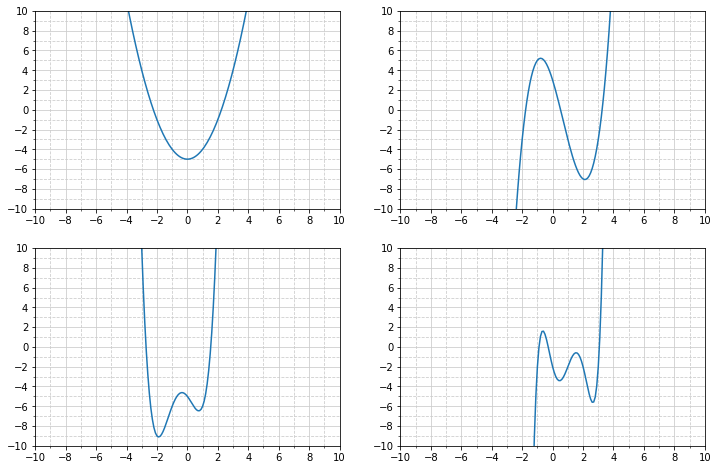

In [2]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
conf_axis(ax)

x = np.arange(-10, 10, 0.1)
ax[0, 0].plot(x, x**2 - 5)
ax[0, 1].plot(x, x**3 - 2*x**2 - 5*x + 3)
ax[1, 0].plot(x, x**4 + 2*x**3 - 2*x**2 - 2*x - 5)
ax[1, 1].plot(x, x**5 - 5*x**4 + 5*x**3 + 5*x**2 - 6*x - 2
plt.show()

_(Explanations from Lecture notes of: Dr. Jon Siach, Manchester Metropolitan University, March 2015; and Prof. Wojciech Matusik, MIT CSAIL, 6.837 Computer Graphics)_
## Parametric equations

A parameter, $t$ is used to determine the value of the variables, e.g. the parametric equation of a straight line is

$$
x(t) = (1-t) x_0 + t x_1 \\
y(t) = (1-t) y_0 + t y_1
$$

where $0 \leq t \leq 1$. Let $P_0 = (x_0, y_0)$, $P_1 = (x_1, y_1)$ and $P = (x,y)$ then $P(t) = (1-t) P_0 + t P_1$.

## Bézier curves

A Bézier curve is a parametric funciton that is used to draw smooth lines. They are named after Pierre Bézier who used them for designing cars at Renault but they were actually invented by Paul de Casteljau 3 years earlier whilst working for Citroën. Common applications for them include CAD software, 3D modelling and smooth trajectory generation.

An $n$ degree Bézier curve is defined using $n+1$ **control points**. Translations, rotations and scaling can be easily applied to the control points.

### De Casteljau's algorithm

Let's assume we have a qubic curve (n=2), this curve requires three control points named $P_{0,1,2}$. Let's define the points $Q_{0,1}$ that lie on the lines $P_{0-1}$ and $P_{1-2}$:

$$
Q_0(t) = (1-t) P_0 + t P_1 \\
Q_1(t) = (1-t) P_1 + t P_2
$$

The points of the Bézier curve lie on the line $Q_{0-1}$:

$$
C(t) = (1-t) Q_0 + t Q_1
$$

Combining all the equations gives a quadratic polynomial function. This derivation can be generalized in the Casteljau's algorithm. Let $P_{i,j}$ denote the control points where $P_{i,0}$ are the original control points $P_0$ to $P_2$, $P_{i,1} are the points $Q_0$ to $Q_1$ and $P_{0,2}$ is C(t) or the points on the curve. Then

$$
P_{i,j}(t) = (1-t) P_{i,j-1} + t P_{i+1, j-1}.
$$

where each $j$ can be understood as the _"level"_ of the curve and $i$ can be understood as the index of the control point in each level. The general form of a $n$ order Bézier curve defined by the contol points $P_i$ is

$$
C(t) = \sum_{i=0}^n b_{i,n}(t) P_i,
$$

where $b_{i,n}(t)$ are called **Bernstein polynomials** that are defined using 


$$
b_{i,n}(t) = \begin{pmatrix} n \\ i \end{pmatrix} t^i (1-t)^{n-i},
$$

and $\begin{pmatrix} n \\ i \end{pmatrix}$ is the Binomial coefficient. The **Binomial coefficient** (read as "$n$ choose $i$) gives the number of ways of choosing $i$ items from a set of $n$ items.

$$
\begin{pmatrix} n \\ i \end{pmatrix} = \frac{n!}{i!(n-i)!}
$$

### Matrix form

Another way of representing Bézier curves from the Bernstein formulation is in matrix form. Expanding the Bernstein polynomials we can rearrange them in the following matrices

$$
C(t) = \begin{pmatrix} P_0 && P_1 && \dots & P_{n-1} & P_n \end{pmatrix} M \begin{pmatrix} 1 \\ t \\ \vdots \\ t^{n-1} \\ t^n \end{pmatrix}
$$

where $M$ is a squared $(n+1) \times (n+1)$ matrix. The coefficients of the matrix $M$ can be [obtained](https://github.com/supiket/bernstein/blob/master/bernstein_matrix.py) as

$$
M_{i,j} = -1^{j-i} \begin{pmatrix} n - i \\ j - i \end{pmatrix} \begin{pmatrix} n \\ i \end{pmatrix}
$$

for the upper right triangular values. The rest are 0.

## Splines as Vector Space

Splines can be study as a vector space. As we can see above, we can express the spline as a basis transformation between the canonical monomial basis of the polynomials' vector space and the Berstein Coefficients. Then, the transformation is applied to the control points in order to obtain the points of the curve (aka the curve is a linear combination of the control points with weights equal to Berstein polynomials at $t$). This can be generalized to a **General Spline Formulation** as

$$
C(t) = \textbf{GBT}(t) = \text{Geometry } \textbf{G} \cdot \text{ Spline Basis } \textbf{B} \cdot \text{ Power Basis } \textbf{T}(t)
$$

- Geometry: control points coordinates assembled into a matrix.
- Spline matrix/basis: defines the type of spline.
- Power basis: the monomials.

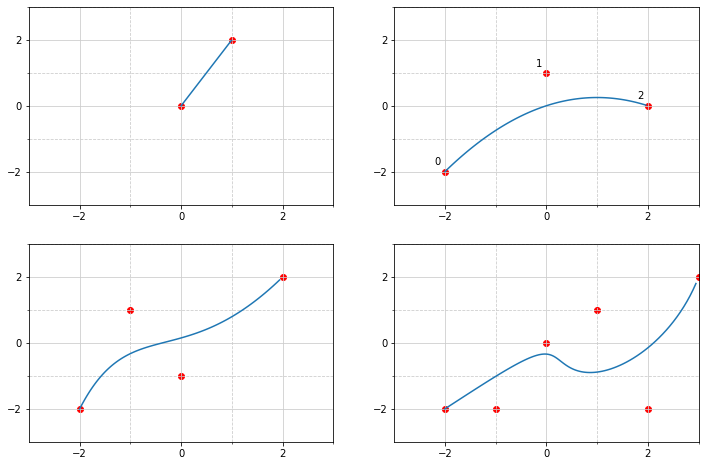

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
conf_axis(ax,3,3)

t = np.arange(0, 1, 0.01)

# Straight line parametric equations
x_0 = 0
x_1 = 1
y_0 = 0
y_1 = 2
x_t = (1-t) * x_0 + t * x_1
y_t = (1-t) * y_0 + t * y_1
ax[0,0].plot(x_t, y_t)
ax[0,0].scatter([x_0, x_1], [y_0, y_1], color='r')

import math

class BezierCurve:
    def __init__(self, n, P):
        self.n = n
        self.n_ext = n+1
        self.P = P # A numpy.array of size: dim X n+1
        self.precomputeBernsCoeff()

    def precomputeBernsCoeff(self):
        self.M = np.zeros((self.n_ext,self.n_ext))
        for j in range(0, self.n_ext):
            for i in range(0, j+1):
                self.M[i,j] = self.mop(j - i) * self.binomial(self.n - i, j - i) * self.binomial(self.n ,i)
        self.PM = self.P @ self.M

    def evaluate(self, t):
        T = np.zeros((self.n_ext, t.shape[0]))
        for i in range(0, self.n_ext):
            T[i] = t**i
        return self.PM @ T


    def plotBernstein(self, ax):
        x = np.linspace(-10,10, 50)
        for i in range(self.n_ext):
            ax.plot(x, self.bernsteinPolynomial(i, 2, x))

    def bernsteinPolynomial(self, i, n, t):
        return self.binomial(n,i) * t**i * (1 - t)**(n-i)

    def binomial(self,n,r):
        return math.factorial(n) // math.factorial(r) // math.factorial(n-r)

    def mop(self, i):
        if((i%2)==0):
            return 1
        else:
            return -1

p = np.array([[-2, 0, 2], [-2, 1, 0]])
curv = BezierCurve(2, p)
c_t = curv.evaluate(t)
ax[0,1].plot(c_t[0,:], c_t[1,:])
ax[0,1].scatter(p[0,:], p[1,:],color='r')
for i in range(p.shape[1]):
    ax[0,1].annotate(i, (p[0,i]-0.2, p[1,i]+0.2))


p = np.array([[-2, -1, 0, 2], [-2, 1, -1, 2]])
curv = BezierCurve(3, p)
c_t = curv.evaluate(t)
ax[1,0].plot(c_t[0,:], c_t[1,:])
ax[1,0].scatter(p[0,:], p[1,:],color='r')

p = np.array([[-2, 0, 1, -1, 2, 3], [-2, 0, 1, -2, -2, 2]])
curv = BezierCurve(5, p)
c_t = curv.evaluate(t)
ax[1,1].plot(c_t[0,:], c_t[1,:])
ax[1,1].scatter(p[0,:], p[1,:],color='r')

plt.show()+2